In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
series = pd.read_csv('national_cement_black_50kg.csv')
series.index = series.Month
series.drop('Month',axis = 1 ,  inplace = True)

In [4]:
series

,National Cement Black (50 Kg)
Month,
2010-01-01,13.81
2010-02-01,13.83
2010-03-01,13.78
2010-04-01,13.96
2010-05-01,13.91
...,...
2021-01-01,15.21
2021-02-01,15.09
2021-03-01,14.87


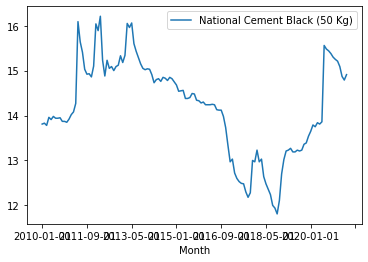

In [5]:
#plt.figure(figsize = (10,10))
#plt.xticks(rotation = 90)
series.plot()
plt.show()

#### Auto Correlation

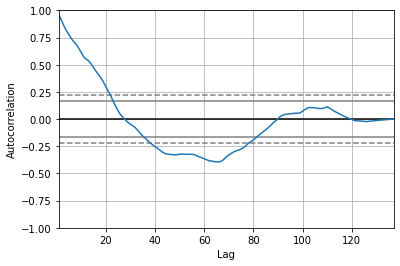

In [6]:
pd.plotting.autocorrelation_plot(series)
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:     National Cement Black (50 Kg)   No. Observations:                  137
Model:                            ARIMA(5, 1, 0)   Log Likelihood                 -28.631
Date:                           Tue, 28 Dec 2021   AIC                             69.261
Time:                                   21:58:46   BIC                             86.737
Sample:                               01-01-2010   HQIC                            76.363
                                    - 05-01-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0345      0.081      0.428      0.668      -0.124       0.193
ar.L2          0.0560      0.107      0.522

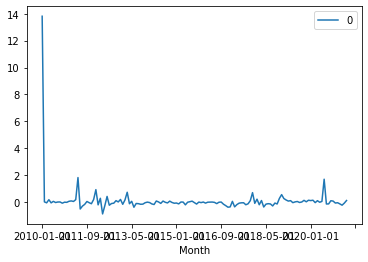

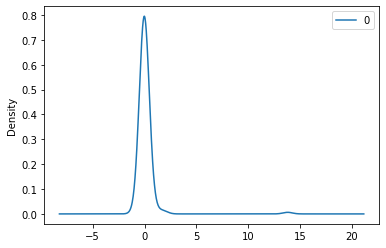

                0
count  137.000000
mean     0.109890
std      1.216274
min     -0.874378
25%     -0.117312
50%     -0.016242
75%      0.075066
max     13.810000


In [8]:
#series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

predicted=13.041797, expected=13.210000
predicted=13.123755, expected=13.230000
predicted=13.133029, expected=13.270000
predicted=13.213904, expected=13.190000
predicted=13.166194, expected=13.190000
predicted=13.175892, expected=13.230000
predicted=13.237650, expected=13.210000
predicted=13.221219, expected=13.230000
predicted=13.223959, expected=13.360000
predicted=13.365102, expected=13.390000
predicted=13.401416, expected=13.540000
predicted=13.529741, expected=13.650000
predicted=13.649310, expected=13.790000
predicted=13.783487, expected=13.750000
predicted=13.730046, expected=13.840000
predicted=13.811125, expected=13.810000
predicted=13.806803, expected=13.860000
predicted=13.852464, expected=15.560000
predicted=15.648165, expected=15.480000
predicted=15.622016, expected=15.440000
predicted=15.242057, expected=15.380000
predicted=15.190240, expected=15.300000
predicted=15.333718, expected=15.250000
predicted=15.252945, expected=15.210000
predicted=15.218859, expected=15.090000


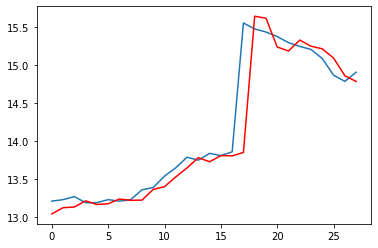

In [9]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [11]:
model_fit.forecast()[0]

14.788538953094047